# 数据分析P2项目 - 彭冰

# 1 数据预览

In [1]:
# 导入相应的包

import numpy as np
import pandas as pd

In [2]:
# 读取CSV文件
# 定义titanic.csv文件路径

filePath = 'titanic-data.csv'

# 读取titanic.csv文件
# titanic_df作为存放CSV的DataFrame

titanic_df = pd.read_csv(filePath)

In [3]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# 1.1提出问题

1、铁达尼号的生还率是多少？

2、样本中平均死亡年龄？生还年龄？

3、哪些因素影响了生还率？

4、年龄和生还率的相关性有多大？船舱等级和生还率相关性有多大？性别和生还率相关性有多大？

5、列举三个自变量和一个因变量

# 1.2初步分析

In [4]:
# 计算生还人数、死亡人数

totalOfSurvived = titanic_df[ titanic_df['Survived'] == 1 ].index.tolist()

totalOfDead = titanic_df[ titanic_df['Survived'] == 0 ].index.tolist()

meanOfSurvived = titanic_df['Survived'].mean()

print('生还人数:%d\n生还率:%f\n死亡人数:%d\n死亡率:%f' % ( len(totalOfSurvived),meanOfSurvived,len(totalOfDead),1-meanOfSurvived) )


生还人数:342
生还率:0.383838
死亡人数:549
死亡率:0.616162


In [5]:
# 计算平均生还年龄和平均死亡年龄

average_age_of_survived = titanic_df[ titanic_df['Survived'] == 1 ]['Age'].mean()
average_age_of_dead = titanic_df[ titanic_df['Survived'] == 0 ]['Age'].mean()

print('平均生还年龄:%f\n平均死亡年龄:%f' % (average_age_of_survived,average_age_of_dead))



平均生还年龄:28.343690
平均死亡年龄:30.626179


# 2 相关属性分布

In [6]:
####################################
# 属性分步分析
####################################
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# 2.1 生还情况分布

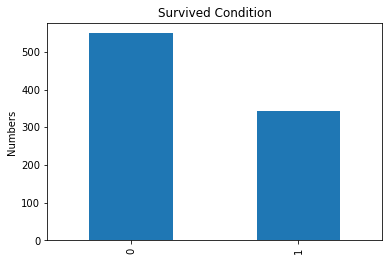

In [7]:
titanic_df['Survived'].value_counts().plot(kind='bar')
plt.title('Survived Condition')
plt.ylabel('Numbers')

# 2.2 乘客船舱等级分布

3：下等舱
2：中等舱
1：头等舱

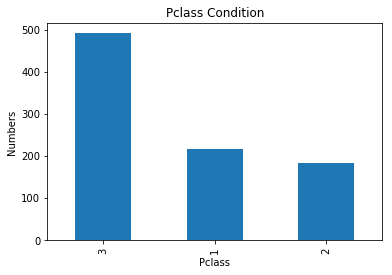

In [8]:
titanic_df['Pclass'].value_counts().plot(kind='bar')
plt.title('Pclass Condition')
plt.ylabel('Numbers')
plt.xlabel('Pclass')

# 2.3 乘客船舱等级与生还情况分布

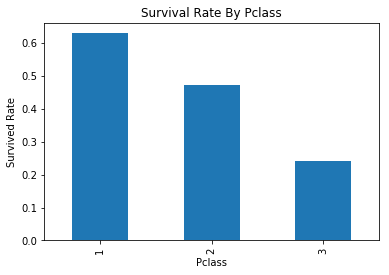

In [9]:
titanic_df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.xlabel('Pclass')  
plt.ylabel('Survived Rate') 
plt.title('Survival Rate By Pclass')

# 2.4 年龄与生还情况分布

In [10]:
# 定义去除columns值为空的记录的方法
def formatNullColumns(dataFrame, columns):
    dataFrameNotNull = dataFrame[ dataFrame[columns].notnull() | dataFrame[columns].apply(lambda x:str(x).isspace())]
    return dataFrameNotNull

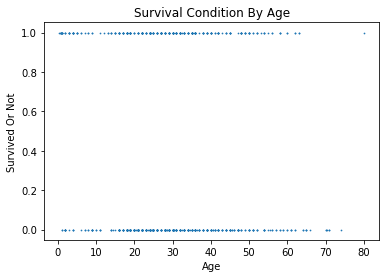

In [11]:
plt.scatter( formatNullColumns(titanic_df,'Age').Age,formatNullColumns(titanic_df,'Age').Survived, s=0.5 )
plt.xlabel('Age')  
plt.ylabel('Survived Or Not') 
plt.title('Survival Condition By Age')

# 2.5 性别和生还情况分布

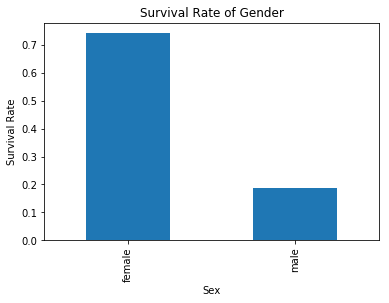

In [12]:
# 性别和生存率的关系
titanic_df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate of Gender')
plt.ylabel('Survival Rate')
plt.show()

# 3 属性与生还率关联统计

# 3.1 船舱等级与生还率关联统计 

In [13]:
# 定义计算相关性的方法
# @param dataFrame 需处理的dataframe
#        columns   相关的属性
def correlationSurvivedByAny(dataFrame, columns):
    # 对某列进行非空处理
    dataFrameNotNull = dataFrame[ dataFrame[columns].notnull() | dataFrame[columns].apply(lambda x:str(x).isspace())]
    
    std_columns = dataFrameNotNull[columns].sub( dataFrameNotNull[columns].mean() ) / dataFrameNotNull[columns].std(ddof=0)
    
    std_survived = dataFrameNotNull.Survived.sub( dataFrameNotNull.Survived.mean() ) / dataFrameNotNull.Survived.std(ddof=0)
    
    return (std_columns * std_survived).mean()



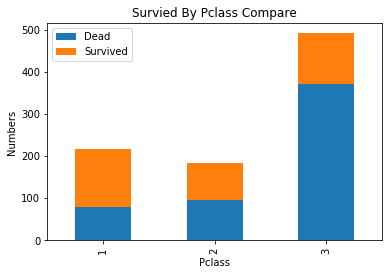

In [14]:
# 统计依据pclass等级的生还人数对比
survivedByPclass = titanic_df.Pclass[titanic_df.Survived == 1].value_counts()
deadByPclass = titanic_df.Pclass[titanic_df.Survived == 0].value_counts()

sddf = pd.DataFrame({
    'Survived':survivedByPclass,
    'Dead':deadByPclass
})

sddf.plot(kind='bar', stacked=True)
plt.title('Survied By Pclass Compare')
plt.xlabel('Pclass') 
plt.ylabel('Numbers')

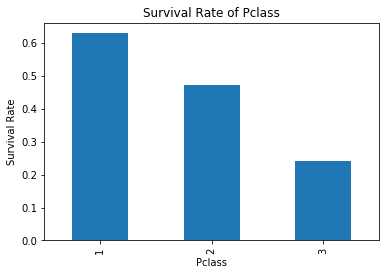

In [15]:
# 统计pclass与生还率的关联
titanic_df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate of Pclass')
plt.ylabel('Survival Rate')
plt.show()

In [16]:
correlationSurvivedByAny(titanic_df, 'Pclass')

-0.33848103596101325

# 3.2 年龄与生还率关联统计

/Users/chris/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


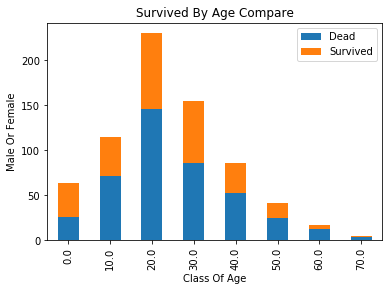

In [42]:
# 统计依据性别不同的生还人数对比
format_df = formatNullColumns(titanic_df,'Age')

#将年龄按照10年为组距进行统计，否则噪点太多
format_df.loc[(format_df.Age <= 10) & (format_df.Age > 0 ),'Age'] = 0
format_df.loc[(format_df.Age <= 20) & (format_df.Age > 10),'Age'] = 10
format_df.loc[(format_df.Age <= 30) & (format_df.Age > 20),'Age'] = 20
format_df.loc[(format_df.Age <= 40) & (format_df.Age > 30),'Age'] = 30
format_df.loc[(format_df.Age <= 50) & (format_df.Age > 40),'Age'] = 40
format_df.loc[(format_df.Age <= 60) & (format_df.Age > 50),'Age'] = 50
format_df.loc[(format_df.Age <= 70) & (format_df.Age > 60),'Age'] = 60
format_df.loc[(format_df.Age <= 80) & (format_df.Age > 70),'Age'] = 70
format_df.loc[(format_df.Age <= 90) & (format_df.Age > 80),'Age'] = 80

survivedByAge = format_df.Age[format_df.Survived == 1].value_counts()
deadByAge = format_df.Age[format_df.Survived == 0].value_counts()

sddf_age = pd.DataFrame({
    'Survived':survivedByAge,
    'Dead':deadByAge
})

sddf_age.plot(kind='bar', stacked=True)
plt.title('Survived By Age Compare')
plt.xlabel('Class Of Age') 
plt.ylabel('Male Or Female')

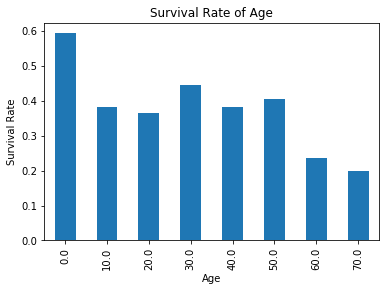

In [46]:
# 统计Age与生还率的关联
format_df.groupby('Age')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate of Age')
plt.ylabel('Survival Rate')
plt.show()

In [48]:
correlationSurvivedByAny(formatNullColumns(titanic_df,'Age'), 'Age')

-0.0772210945721773

# 3.3 性别与生还率关联统计

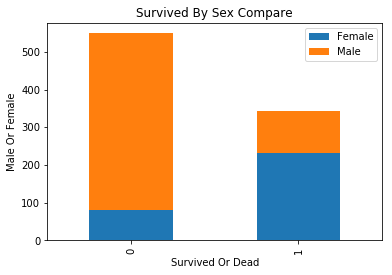

In [21]:
# 统计依据性别不同的生还人数对比
survivedBySex = titanic_df.Survived[titanic_df.Sex == 'male'].value_counts()
deadBySex = titanic_df.Survived[titanic_df.Sex == 'female'].value_counts()

sddf_sex = pd.DataFrame({
    'Male':survivedBySex,
    'Female':deadBySex
})

sddf_sex.plot(kind='bar', stacked=True)
plt.title('Survived By Sex Compare')
plt.xlabel('Survived Or Dead') 
plt.ylabel('Male Or Female')

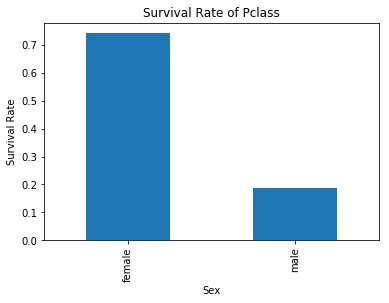

In [22]:
# 统计性别与生还率的关联
titanic_df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate of Sex')
plt.ylabel('Survival Rate')
plt.show()

In [49]:
titanic_df_sex = titanic_df
titanic_df_sex.loc[titanic_df_sex.Sex == 'male','Sex'] = 1
titanic_df_sex.loc[titanic_df_sex.Sex == 'female','Sex'] = 0
correlationSurvivedByAny(titanic_df_sex, 'Sex')

-0.54335138065774724

In [51]:
# 票价对和生还率的相关性
correlationSurvivedByAny(titanic_df, 'Fare')

0.08162940708348272

In [52]:
# 父母孩子数量对和生还率的相关性
correlationSurvivedByAny(titanic_df, 'Parch')

0.08162940708348272

In [53]:
# 配偶家人数量对和生还率的相关性
correlationSurvivedByAny(titanic_df, 'SibSp')

-0.03532249888573573

# 4 回答问题

1、铁达尼号的生还率是多少？

    答：0.383838

2、样本中平均死亡年龄？生还年龄？
    
    答：平均生还年龄:28.3；平均死亡年龄:30.6


3、哪些因素影响了生还率？

    答：船舱等级，性别对生还率的影响较大

4、年龄和生还率的相关性有多大？船舱等级和生还率相关性有多大？性别和生还率相关性有多大？

    答：Age相关率 -0.077       Pclass相关率 -0.34      Sex相关率 -0.54
        

5、列举三个自变量和一个因变量

    答：
    1、自变量：乘客年龄；乘客船舱等级；乘客性别
    2、因变量：乘客的生还率
        